# What is HAR ?
- Human activity recognition, or HAR for short, is a broad field of study concerned with identifying the specific movement or action of a person based on sensor data. 
- Movements are often typical activities performed indoors, such as walking, talking, standing, and sitting

# Why it is important ?

- Human activity recognition plays a significant role in human-to-human interaction and interpersonal relations. 
- Because it provides information about the identity of a person, their personality, and psychological state, it is difficult to extract. 
- The human ability to recognize another person’s activities is one of the main subjects of study of the scientific areas of computer vision and machine learning. As a result of this research, many applications, including video surveillance systems, human-computer interaction, and robotics for human behavior characterization, require a multiple activity recognition system.

#  Here are some example:

# What is VGG16?

- The VGG model, or VGGNet, that supports 16 layers is also referred to as VGG16, which is a convolutional neural network model proposed by A. Zisserman and K. Simonyan from the University of Oxford. These researchers published their model in the research paper titled, [“Very Deep Convolutional Networks for Large-Scale Image Recognition.”](https://arxiv.org/abs/1409.1556)

- The VGG16 model achieves almost 92.7% top-5 test accuracy in ImageNet. ImageNet is a dataset consisting of more than 14 million images belonging to nearly 1000 classes. Moreover, it was one of the most popular models submitted to ILSVRC-2014. It replaces the large kernel-sized filters with several 3×3 kernel-sized filters one after the other, thereby making significant improvements over AlexNet. The VGG16 model was trained using Nvidia Titan Black GPUs for multiple weeks.

- As mentioned above, the VGGNet-16 supports 16 layers and can classify images into 1000 object categories, including keyboard, animals, pencil, mouse, etc. Additionally, the model has an image input size of 224-by-224.  

# HAR using VGG16

### Importing library

In [1]:
import os
import glob
import random
import numpy as np
import pandas as pd

import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

from tqdm import tqdm

from PIL import Image

from tensorflow.keras.utils import to_categorical

import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt

# Setting up the path and loading csv files

In [2]:
train_csv = pd.read_csv("../input/human-action-recognition-har-dataset/Human Action Recognition/Training_set.csv")
test_csv = pd.read_csv("../input/human-action-recognition-har-dataset/Human Action Recognition/Testing_set.csv")

In [3]:
train_fol = glob.glob("../input/human-action-recognition-har-dataset/Human Action Recognition/train/*") 
test_fol = glob.glob("../input/human-action-recognition-har-dataset/Human Action Recognition/test/*")

In [4]:
train_csv

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop
...,...,...
12595,Image_12596.jpg,sitting
12596,Image_12597.jpg,clapping
12597,Image_12598.jpg,sitting
12598,Image_12599.jpg,dancing


In [5]:
train_csv.label.value_counts()

sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: label, dtype: int64

In [6]:
import plotly.express as px
l = train_csv.label.value_counts()
fig = px.pie(train_csv, values=l.values, names=l.index, title='Distribution of Human Activity')
fig.show()

In [7]:
filename = train_csv['filename']

situation = train_csv['label']

In [8]:
filename

0            Image_1.jpg
1            Image_2.jpg
2            Image_3.jpg
3            Image_4.jpg
4            Image_5.jpg
              ...       
12595    Image_12596.jpg
12596    Image_12597.jpg
12597    Image_12598.jpg
12598    Image_12599.jpg
12599    Image_12600.jpg
Name: filename, Length: 12600, dtype: object

In [9]:
situation

0                   sitting
1              using_laptop
2                   hugging
3                  sleeping
4              using_laptop
                ...        
12595               sitting
12596              clapping
12597               sitting
12598               dancing
12599    listening_to_music
Name: label, Length: 12600, dtype: object

# Creating a function to random take a image and display it with its label

In [10]:
def disp():
    num = random.randint(1,10000)
    imgg = "Image_{}.jpg".format(num)
    train = "../input/human-action-recognition-har-dataset/Human Action Recognition/train/"
    if os.path.exists(train+imgg):
        testImage = img.imread(train+imgg)
        plt.imshow(testImage)
        plt.title("{}".format(train_csv.loc[train_csv['filename'] == "{}".format(imgg), 'label'].item()))

    else:
        #print(train+img)
        print("File Path not found \nSkipping the file!!")

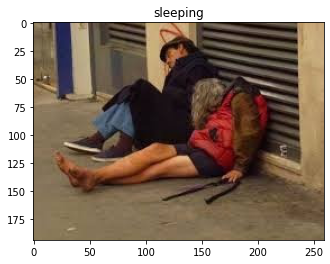

In [11]:
disp()

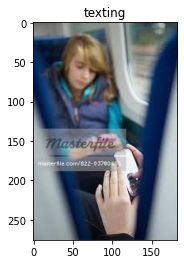

In [12]:
disp()

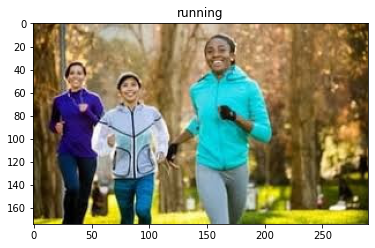

In [13]:
disp()

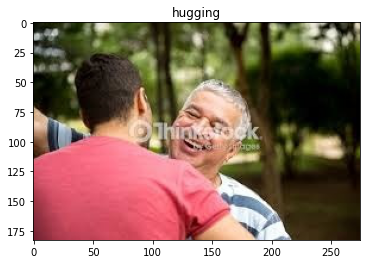

In [14]:
disp()

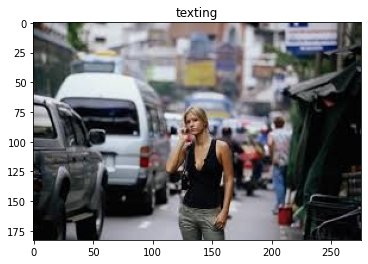

In [15]:
disp()

# Processing data

In [16]:
img_data = []
img_label = []
length = len(train_fol)
for i in (range(len(train_fol)-1)):
    t = '../input/human-action-recognition-har-dataset/Human Action Recognition/train/' + filename[i]    
    temp_img = Image.open(t)
    img_data.append(np.asarray(temp_img.resize((160,160))))
    img_label.append(situation[i])

In [17]:
inp_shape = (160, 160,3)

In [18]:
iii = img_data
iii = np.asarray(iii)
type(iii)

numpy.ndarray

In [19]:
y_train = to_categorical(np.asarray(train_csv['label'].factorize()[0]))
print(y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
dir(tf.keras.applications)

['DenseNet121',
 'DenseNet169',
 'DenseNet201',
 'EfficientNetB0',
 'EfficientNetB1',
 'EfficientNetB2',
 'EfficientNetB3',
 'EfficientNetB4',
 'EfficientNetB5',
 'EfficientNetB6',
 'EfficientNetB7',
 'InceptionResNetV2',
 'InceptionV3',
 'MobileNet',
 'MobileNetV2',
 'MobileNetV3Large',
 'MobileNetV3Small',
 'NASNetLarge',
 'NASNetMobile',
 'ResNet101',
 'ResNet101V2',
 'ResNet152',
 'ResNet152V2',
 'ResNet50',
 'ResNet50V2',
 'VGG16',
 'VGG19',
 'Xception',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'densenet',
 'efficientnet',
 'imagenet_utils',
 'inception_resnet_v2',
 'inception_v3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3',
 'nasnet',
 'resnet',
 'resnet50',
 'resnet_v2',
 'vgg16',
 'vgg19',
 'xception']

In [21]:
vgg_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(160,160,3),
                   pooling='avg',classes=15,
                   weights='../input/vgg16-weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')

print(pretrained_model)

for layer in pretrained_model.layers:
        layer.trainable=False

vgg_model.add(pretrained_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(15, activation='softmax'))

In [22]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dense_1 (Dense)              (None, 15)                7695      
Total params: 14,985,039
Trainable params: 270,351
Non-trainable params: 14,714,688
_________________________________________________________________


In [24]:
history = vgg_model.fit(iii,y_train, epochs=10)

Epoch 1/10
394/394 [==============================] - 1610s 4s/step - loss: 2.2173 - accuracy: 0.4509
Epoch 2/10
394/394 [==============================] - 1614s 4s/step - loss: 1.2029 - accuracy: 0.6099
Epoch 3/10
394/394 [==============================] - 1622s 4s/step - loss: 0.9339 - accuracy: 0.6910
Epoch 4/10
394/394 [==============================] - 1614s 4s/step - loss: 0.7285 - accuracy: 0.7574
Epoch 5/10
394/394 [==============================] - 1611s 4s/step - loss: 0.5399 - accuracy: 0.8231
Epoch 6/10
394/394 [==============================] - 1614s 4s/step - loss: 0.3927 - accuracy: 0.8709
Epoch 7/10
394/394 [==============================] - 1612s 4s/step - loss: 0.2824 - accuracy: 0.9094
Epoch 8/10
394/394 [==============================] - 1616s 4s/step - loss: 0.2174 - accuracy: 0.9294
Epoch 9/10
394/394 [==============================] - 1620s 4s/step - loss: 0.1690 - accuracy: 0.9474
Epoch 10/10
394/394 [==============================] - 1623s 4s/step - loss: 0.141

In [25]:
vgg_model.save_weights("model.h5")

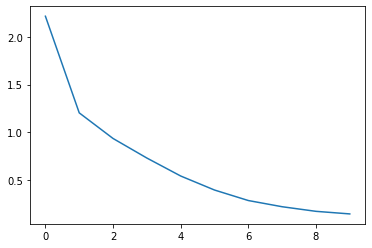

In [26]:
losss = history.history['loss']
plt.plot(losss)

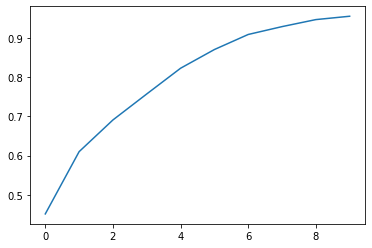

In [27]:
accu = history.history['accuracy']
plt.plot(accu)

# Custom Testing

In [28]:
# Function to read images as array

def read_image(fn):
    image = Image.open(fn)
    return np.asarray(image.resize((160,160)))

In [29]:
# Function to predict

def test_predict(test_image):
    result = vgg_model.predict(np.asarray([read_image(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", prediction)

    image = img.imread(test_image)
    plt.imshow(image)
    plt.title(prediction)

probability: 61.87441945075989%
Predicted class :  4


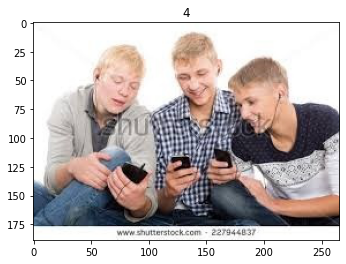

In [30]:
test_predict('../input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_1010.jpg')

probability: 88.96034359931946%
Predicted class :  4


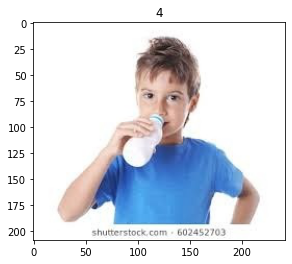

In [31]:
test_predict('../input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_101.jpg')

probability: 99.82637763023376%
Predicted class :  1


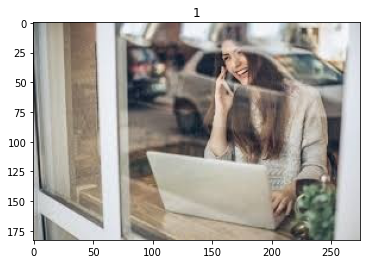

In [32]:
test_predict('../input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_1050.jpg')

![](https://c.tenor.com/MG_HgOuyCv8AAAAd/bye-goodbye.gif)

goodbye